In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import tensorflow as tf
from keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import  Dropout, Reshape
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.initializers import glorot_uniform
from keras.models import Model

In [3]:
def reshaping(x):
  return np.reshape(x,(32,32))

a = np.load('/content/drive/MyDrive/Shuvo Sir Thesis Dataset/New Dataset/DEV_Numeral_Train_PDISIwR20_32.npz')
x_train, y_train = a['arr_0'], a['arr_1']

xx_train = list((map(reshaping,x_train)))
x_train_ = np.array(xx_train)


b = np.load('/content/drive/MyDrive/Shuvo Sir Thesis Dataset/New Dataset/DEV_Numeral_Test_PDISI_32.npz')
x_test, y_test = b['arr_0'], b['arr_1']

xx_test = list((map(reshaping,x_test)))
x_test_ = np.array(xx_test)

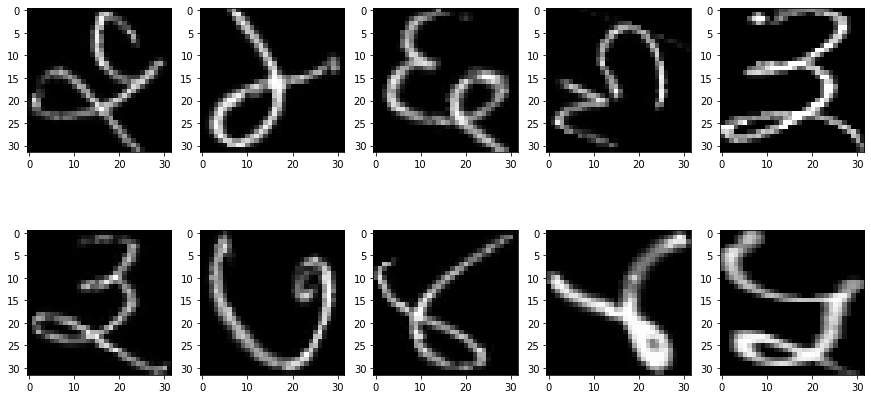

Labels : [[5]
 [4]
 [6]
 [9]
 [3]]
Labels : [[3]
 [7]
 [4]
 [4]
 [5]]


In [4]:
fig1 = plt.figure(figsize = (15,15))

for i in range(5):
    ax1 = fig1.add_subplot(1,5,i+1) 
    ax1.imshow(x_train_[i], interpolation='none', cmap=plt.cm.gray)
    ax2 = fig1.add_subplot(2,5,i+6) 
    ax2.imshow(x_train_[i+6], interpolation='none', cmap=plt.cm.gray)
plt.show()

print("Labels : {}".format(y_train[0:5]))
print("Labels : {}".format(y_train[6:11]))

In [5]:
# Normalizing the input
x_train_ = x_train_.astype('float32')
x_train_/=255

x_test_ = x_test_.astype('float32')
x_test_/=255

print(x_train_.shape)
print(x_test_.shape)

(54000, 32, 32)
(3750, 32, 32)


In [6]:
y_train_ = to_categorical(y_train, num_classes=10, dtype='float32')
y_test_ = to_categorical(y_test, num_classes=10, dtype='float32')

print("Train Set Size = {} images".format(y_train.shape[0]))
print("Test Set Size = {} images".format(y_test.shape[0]))

Train Set Size = 54000 images
Test Set Size = 3750 images


In [7]:
# load model
from keras import models    
model_new = models.load_model('/content/drive/MyDrive/model/vgg16_model.h5')
#set trainable false for pretrained model
for layer in model_new.layers[:-34]:
    layer.trainable = False

for l in model_new.layers:
    print(l.name, l.trainable)

input_1 False
zero_padding2d False
block1_conv1 False
batch_normalization False
activation False
block1_conv2 False
batch_normalization_1 False
activation_1 False
block1_pool False
block2_conv1 False
batch_normalization_2 True
activation_2 True
block2_conv2 True
batch_normalization_3 True
activation_3 True
block2_pool True
block3_conv1 True
batch_normalization_4 True
activation_4 True
block3_conv2 True
batch_normalization_5 True
activation_5 True
block3_conv3 True
batch_normalization_6 True
activation_6 True
block3_pool True
block4_conv1 True
batch_normalization_7 True
activation_7 True
block4_conv2 True
batch_normalization_8 True
activation_8 True
block4_conv3 True
batch_normalization_9 True
activation_9 True
block4_pool True
dropout True
flatten True
dropout_1 True
fc1 True
dropout_2 True
fc2 True
dropout_3 True
predictions True


In [8]:
model_new.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 38, 38, 1)        0         
 2D)                                                             
                                                                 
 block1_conv1 (Conv2D)       (None, 38, 38, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 38, 38, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 38, 38, 64)        0         
                                                                 
 block1_conv2 (Conv2D)       (None, 38, 38, 64)        36928 

In [9]:
optimizer = 'adam'
objective = 'categorical_crossentropy'

#extract layer weight
last_layer = model_new.get_layer('block4_pool')
last_output = last_layer.output

net = Dropout(rate=.2)(last_output)
net = Flatten()(net)
net = Dropout(rate=.5)(net)

net = Dense(2048, activation='relu', name='fc')(net)
net = Dropout(rate=.2)(net)
net = Dense(1024, activation='relu', name='fc2')(net)
net = Dropout(rate=.2)(net)

net = Dense(10, activation='softmax', name='predictions_utl')(net)

# Create model
model_n = Model(inputs = model_new.input, outputs = net, name='vgg16_utl')
model_n.compile(optimizer=optimizer, loss=objective, metrics=['accuracy'])

model_n.summary()

Model: "vgg16_utl"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 38, 38, 1)        0         
 2D)                                                             
                                                                 
 block1_conv1 (Conv2D)       (None, 38, 38, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 38, 38, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 38, 38, 64)        0         
                                                                 
 block1_conv2 (Conv2D)       (None, 38, 38, 64)        36

In [10]:
for l in model_n.layers:
    print(l.name, l.trainable)

input_1 False
zero_padding2d False
block1_conv1 False
batch_normalization False
activation False
block1_conv2 False
batch_normalization_1 False
activation_1 False
block1_pool False
block2_conv1 False
batch_normalization_2 True
activation_2 True
block2_conv2 True
batch_normalization_3 True
activation_3 True
block2_pool True
block3_conv1 True
batch_normalization_4 True
activation_4 True
block3_conv2 True
batch_normalization_5 True
activation_5 True
block3_conv3 True
batch_normalization_6 True
activation_6 True
block3_pool True
block4_conv1 True
batch_normalization_7 True
activation_7 True
block4_conv2 True
batch_normalization_8 True
activation_8 True
block4_conv3 True
batch_normalization_9 True
activation_9 True
block4_pool True
dropout True
flatten True
dropout_1 True
fc True
dropout_2 True
fc2 True
dropout_3 True
predictions_utl True


In [11]:
nb_epoch = 100
batch_size = 32

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

ret = model_n.fit(x_train_.reshape((-1,32,32,1)), y_train_, 
                  epochs=nb_epoch, batch_size=batch_size, verbose=1,
                  #validation_split=0.3,
                  validation_data=(x_test_, y_test_),
                  callbacks=[es])

Epoch 1/100
1688/1688 [==============================] - 106s 56ms/step - loss: 0.1224 - accuracy: 0.9683 - val_loss: 0.1043 - val_accuracy: 0.9755
Epoch 2/100
1688/1688 [==============================] - 93s 55ms/step - loss: 0.0391 - accuracy: 0.9921 - val_loss: 0.0397 - val_accuracy: 0.9912
Epoch 3/100
1688/1688 [==============================] - 93s 55ms/step - loss: 0.0462 - accuracy: 0.9927 - val_loss: 0.0211 - val_accuracy: 0.9952
Epoch 4/100
1688/1688 [==============================] - 93s 55ms/step - loss: 0.0274 - accuracy: 0.9954 - val_loss: 0.0452 - val_accuracy: 0.9917
Epoch 5/100
1688/1688 [==============================] - 93s 55ms/step - loss: 0.0201 - accuracy: 0.9963 - val_loss: 0.1213 - val_accuracy: 0.9872
Epoch 6/100
1688/1688 [==============================] - 92s 55ms/step - loss: 0.0272 - accuracy: 0.9954 - val_loss: 0.0411 - val_accuracy: 0.9920
Epoch 7/100
1688/1688 [==============================] - 92s 55ms/step - loss: 0.0174 - accuracy: 0.9970 - val_loss: 

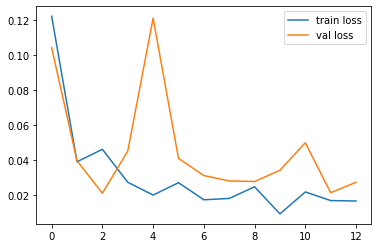

In [12]:
plt.plot(ret.history['loss'], label='train loss')
plt.plot(ret.history['val_loss'], label='val loss')
plt.legend()
plt.show()

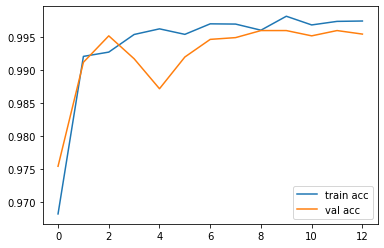

In [13]:
plt.plot(ret.history['accuracy'], label='train acc')
plt.plot(ret.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [14]:
# evaluate the model
_, train_acc = model_n.evaluate(x_train_, y_train_, verbose=0)
_, test_acc = model_n.evaluate(x_test_, y_test_, verbose=0)
print('Train accuracy: %.3f, Test accuracy: %.3f' % (train_acc, test_acc))

Train accuracy: 1.000, Test accuracy: 0.995


In [15]:
predictions = model_n.predict(x_test_.reshape((-1,32,32,1)), verbose=0)

In [16]:
def test_accuracy():
    err = []
    t = 0
    for i in range(predictions.shape[0]):
        if (np.argmax(predictions[i]) == y_test[i]):
            t = t+1
        else:
            err.append(i)
    return t, float(t)*100/predictions.shape[0], err

In [17]:
p = test_accuracy()
print("Test accuracy: {} %".format(p[1]))

Test accuracy: 99.54666666666667 %


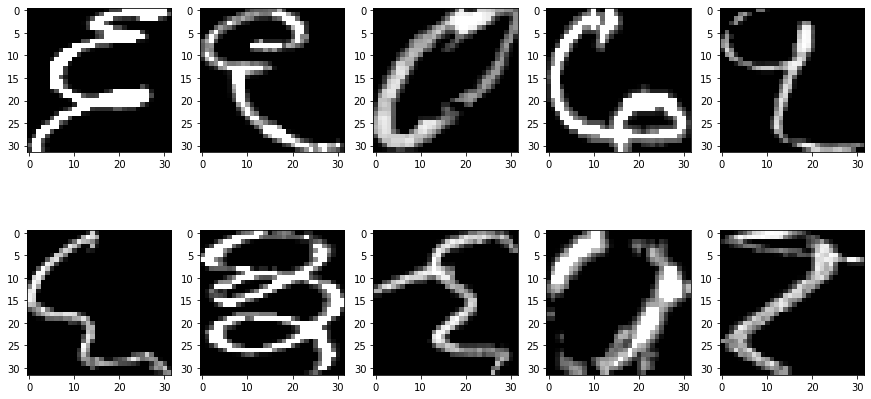

True:          [[6]
 [6]
 [0]
 [7]
 [1]]
classified as: [9 1 9 8 2]
True:          [[6]
 [3]
 [9]
 [0]
 [1]]
classified as: [9 6 6 6 2]


In [18]:
fig1 = plt.figure(figsize = (15,15))

for i in range(5):
    ax1 = fig1.add_subplot(1,5,i+1) 
    ax1.imshow(x_test_[p[2][i]], interpolation='none', cmap=plt.cm.gray)
    ax2 = fig1.add_subplot(2,5,i+6) 
    ax2.imshow(x_test_[p[2][i+6]], interpolation='none', cmap=plt.cm.gray)
plt.show()

print("True:          {}".format(y_test[p[2][0:5]]))
print("classified as: {}".format(np.argmax(predictions[p[2][0:5]], axis=1)))

print("True:          {}".format(y_test[p[2][6:11]]))
print("classified as: {}".format(np.argmax(predictions[p[2][6:11]], axis=1)))